# Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.size

4242

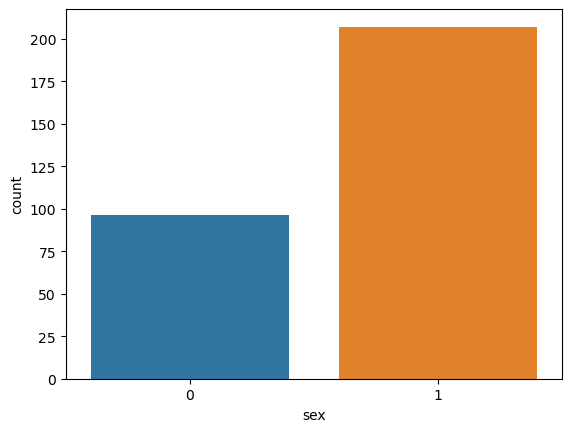

In [6]:
sns.countplot(data=df,x=df.sex)
plt.show()

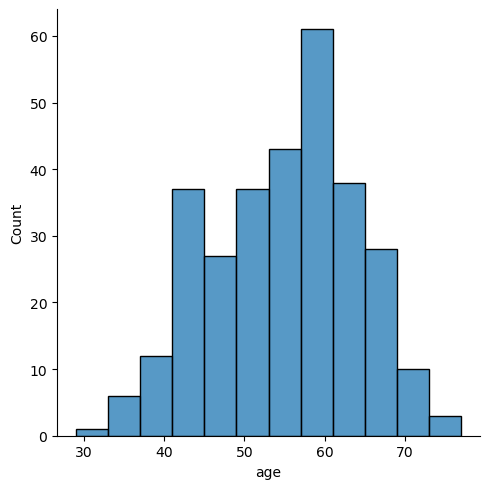

In [7]:
sns.displot(df['age'])
plt.show()

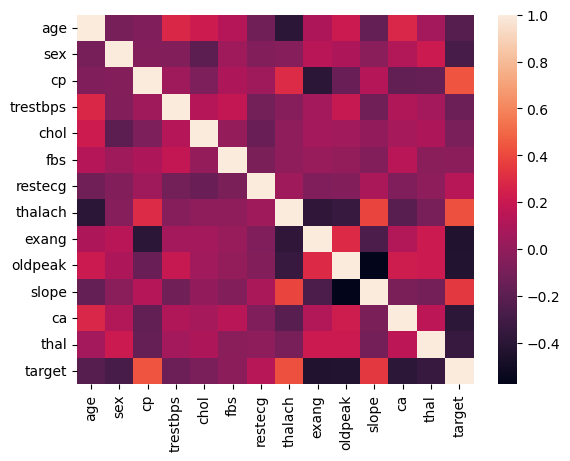

In [8]:
sns.heatmap(df.corr(),annot=False)
plt.show()

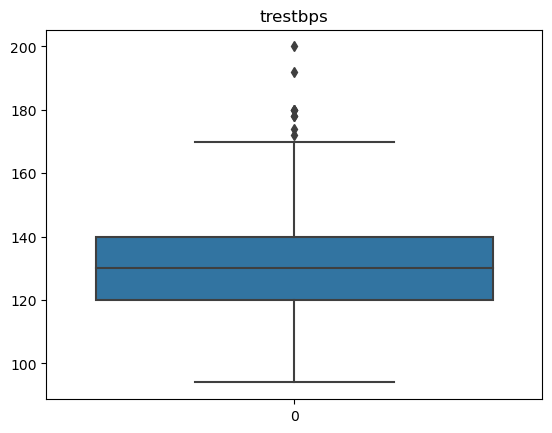

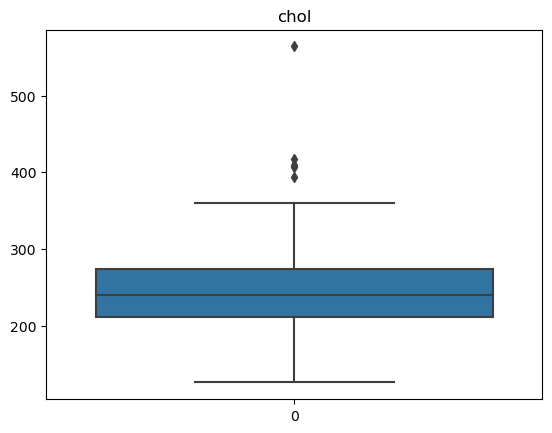

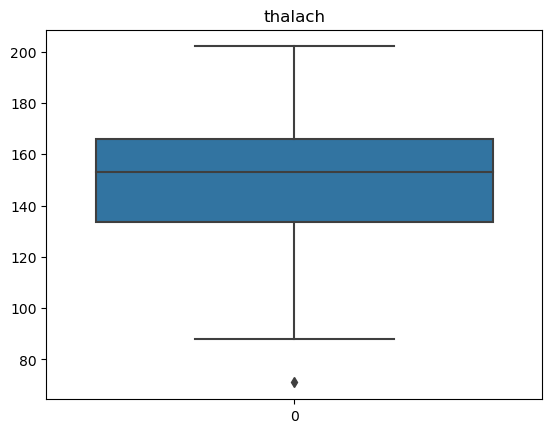

In [9]:
for i in ['trestbps','chol','thalach']:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

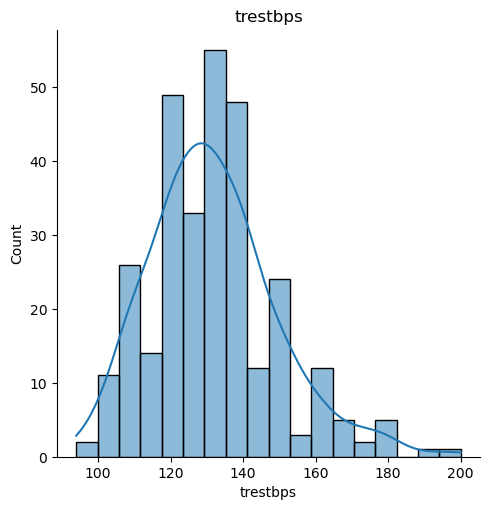

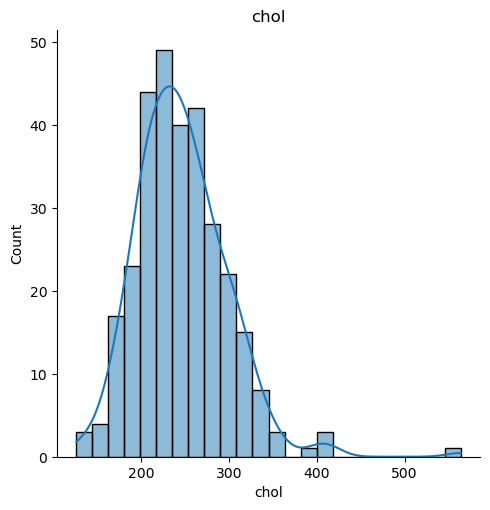

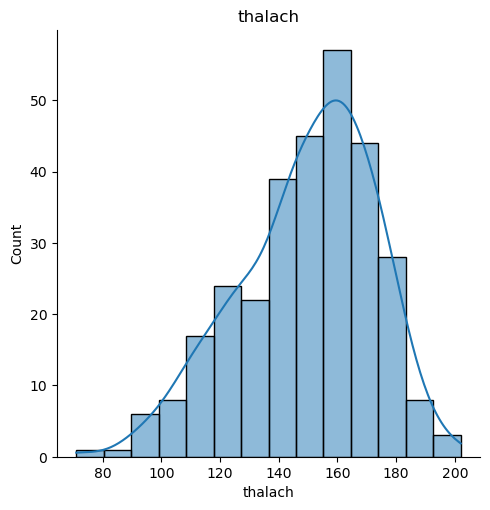

In [10]:
for i in ['trestbps','chol','thalach']:
    sns.displot(df[i],kde=True)
    plt.title(i)
    plt.show()

In [11]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL =Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [12]:
for i in ['trestbps','chol','thalach','age']:
    UL,LL = outlier_limit(df[i])
    df[i] = np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

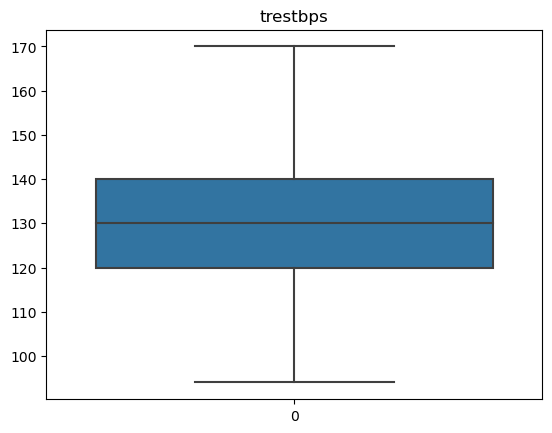

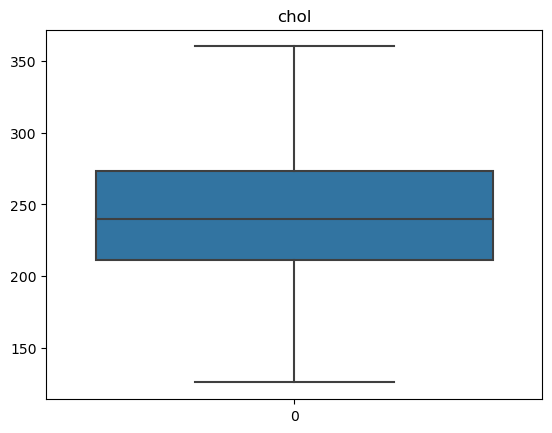

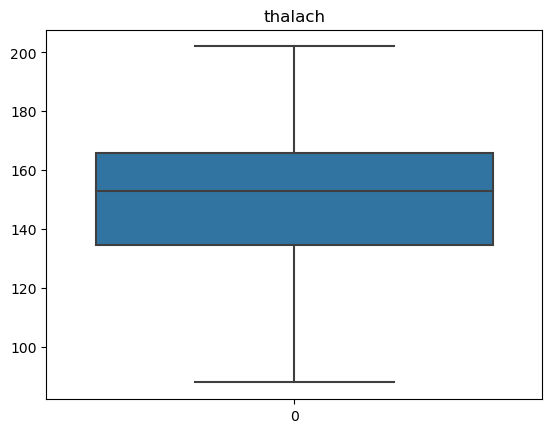

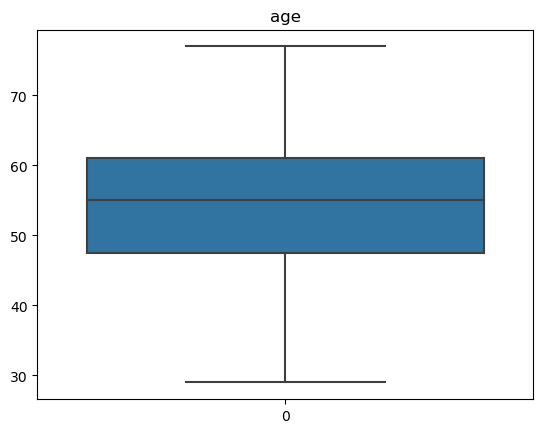

In [13]:
for i in ['trestbps','chol','thalach','age']:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [14]:
df.dropna(inplace=True)

In [15]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [19]:
models = {
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "GaussianNB":GaussianNB()
}

In [20]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='accuracy',cv=10,n_jobs=-1)
    print('Cross validation model: {}'.format(name))
    print('Mean score: ',np.mean(scores)*100)
    print('*'*100)

Cross validation model: LogisticRegression
Mean score:  82.57389162561577
****************************************************************************************************
Cross validation model: DecisionTreeClassifier
Mean score:  77.03201970443351
****************************************************************************************************
Cross validation model: RandomForestClassifier
Mean score:  82.93103448275862
****************************************************************************************************
Cross validation model: AdaBoostClassifier
Mean score:  79.82758620689656
****************************************************************************************************
Cross validation model: GradientBoostingClassifier
Mean score:  80.84975369458128
****************************************************************************************************
Cross validation model: KNeighborsClassifier
Mean score:  81.20689655172413
*********************************

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
model.fit(x_train,y_train)
print("Model terained with KNeighbours classifier")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model terained with KNeighbours classifier
Model accuracy on train is: 1.0
Model accuracy on test is : 0.8620689655172413
confusion_matrix train is: [[102   0]
 [  0 128]]
Confusion_matrix test is [[24  3]
 [ 5 26]]
wrong predictions made: (8, '/', 58)


------------------------------------------------Accuracy Score-------------------------------------------------------
0.8620689655172413
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.90      0.84      0.87        31

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58

----------------------------------------------------------Confusion Matrix---------------------------------------------


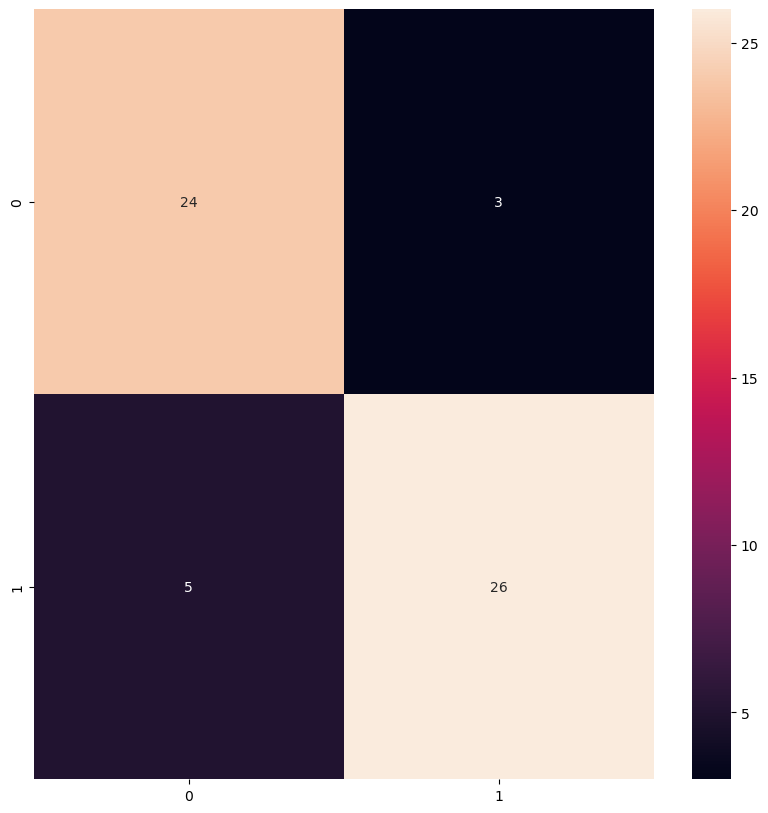

In [24]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, model.predict(x_test)))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, model.predict(x_test)))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True);

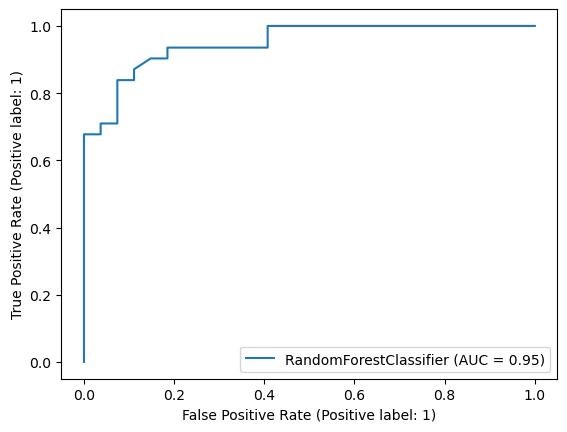

In [25]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)